<a href="https://colab.research.google.com/github/subhamyadav580/Titanic-Passenger-Survival-Prediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Importing

In [297]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
pip install bcolz

In [299]:
pip install isoweek

In [300]:
pip install pandas-summary

In [302]:
from fastai.structured import *
from fastai.imports import *
import seaborn as sns

In [303]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
submission_data = pd.read_csv('data/gender_submission.csv')

## Data Preprocessing

In [304]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [305]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [306]:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [308]:
(train_data.isnull().sum().sort_index()/len(train_data))

Age            0.198653
Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Survived       0.000000
Ticket         0.000000
dtype: float64

In [309]:
train_cats(train_data)

In [310]:
train, train_target, train_nas = proc_df(train_data, 'Survived', skip_flds=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test, test_target, test_nas = proc_df(test_data, skip_flds=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [311]:
submission_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [312]:
test_target = submission_data['Survived'].to_numpy()

In [313]:
test_target

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 

In [314]:
(train.isnull().sum().sort_index()/len(train))

Age         0.0
Age_na      0.0
Embarked    0.0
Fare        0.0
Parch       0.0
Pclass      0.0
Sex         0.0
SibSp       0.0
dtype: float64

In [315]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

train_data['person'] = train_data[['Age','Sex']].apply(titanic_children,axis=1)

In [316]:
train.drop(['Age_na'], axis=1, inplace=True)
test.drop(['Age_na', 'Fare_na'], axis=1, inplace=True)

In [317]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,2,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,2,27.0,0,0,13.0000,3
887,1,1,19.0,0,0,30.0000,3
888,3,1,28.0,1,2,23.4500,3
889,1,2,26.0,0,0,30.0000,1


In [318]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,3
2,2,2,62.0,0,0,9.6875,2
3,3,2,27.0,0,0,8.6625,3
4,3,1,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...
413,3,2,27.0,0,0,8.0500,3
414,1,1,39.0,0,0,108.9000,1
415,3,2,38.5,0,0,7.2500,3
416,3,2,27.0,0,0,8.0500,3


## Data Visualization

### **Gender Plot**

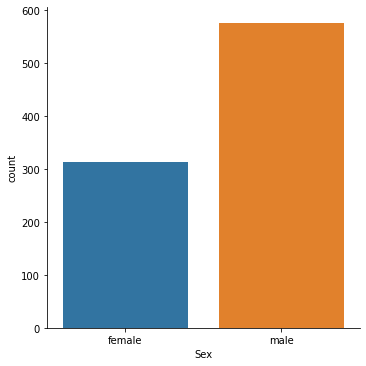

In [319]:
sns.catplot(x='Sex', data=train_data, kind='count')

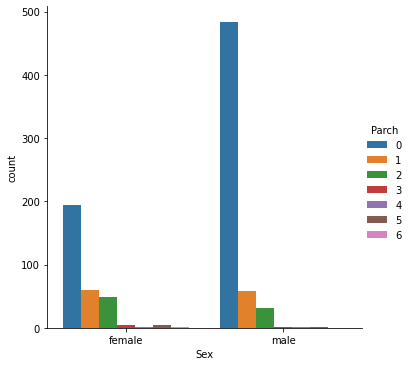

In [320]:
sns.catplot(x='Sex', data=train_data, hue='Parch',kind='count')

### **Class Plot**

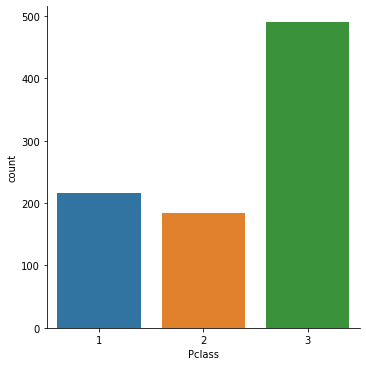

In [321]:
sns.catplot(x='Pclass', data=train_data, kind='count')

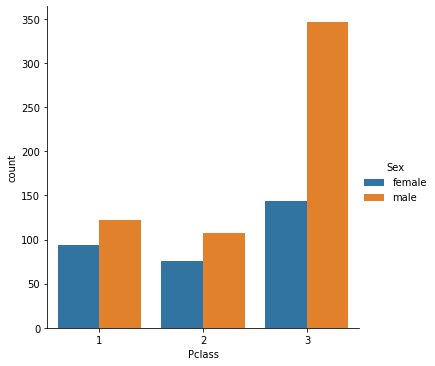

In [322]:
sns.catplot(x='Pclass', data=train_data, hue='Sex',kind='count')

### **Ages of Passenger**

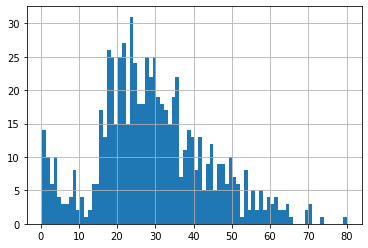

In [323]:
train_data['Age'].hist(bins=80)

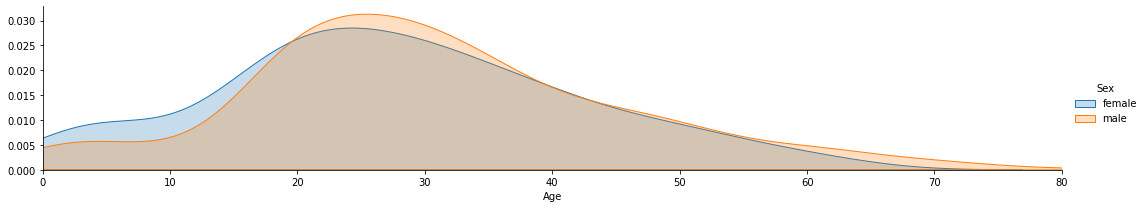

In [324]:
as_fig = sns.FacetGrid(train_data,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = train_data['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

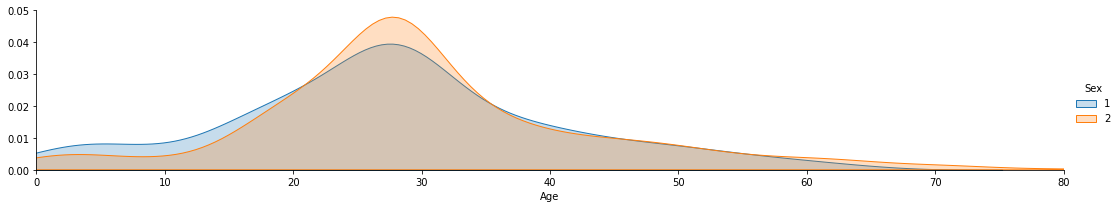

In [325]:
as_fig = sns.FacetGrid(train,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

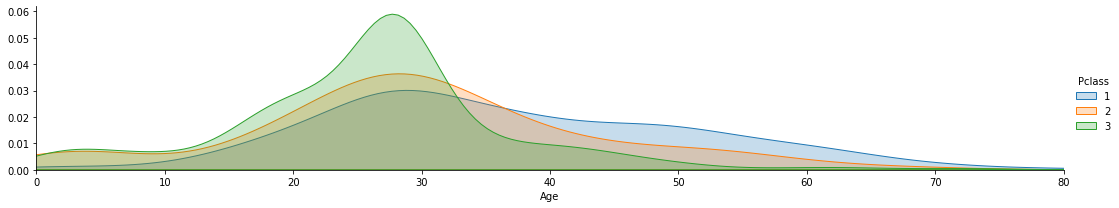

In [326]:
as_fig = sns.FacetGrid(train,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

In [327]:
# Average Age 

train_data['Age'].mean()

29.69911764705882

In [328]:
train['Age'].mean()

29.36158249158249

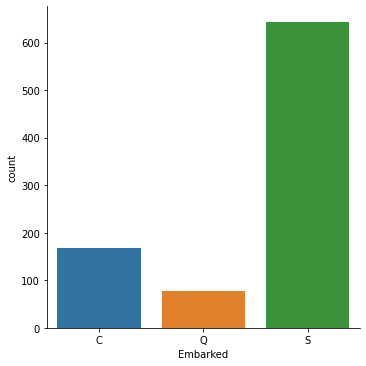

In [329]:
sns.catplot(x='Embarked', data=train_data, kind='count')

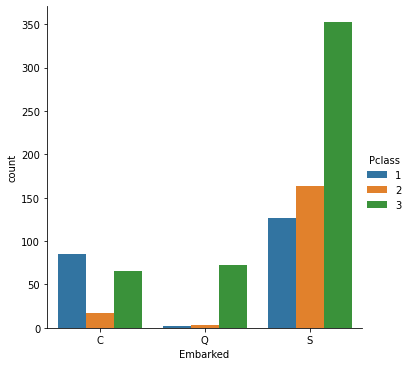

In [330]:
sns.catplot(x='Embarked', data=train_data, hue='Pclass',kind='count')

In [331]:
train_data['Alone'] = train_data.Parch + train_data.SibSp

In [332]:
train_data.Alone.isnull().sum()

0

In [333]:
train_data.Alone.loc[train_data.Alone > 0] = 'With Family'
train_data.Alone.loc[train_data.Alone == 0] = 'Without Family'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [334]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Without Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Without Family
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Without Family
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Without Family


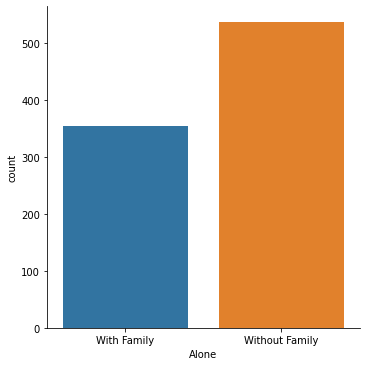

In [335]:
sns.catplot(x = 'Alone', data=train_data, kind='count')

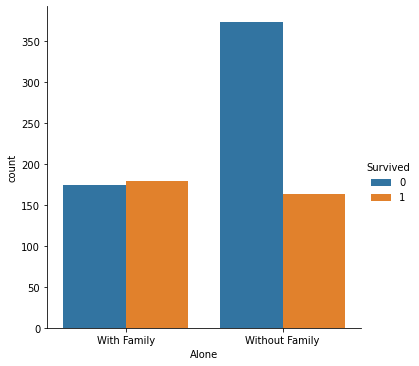

In [336]:
sns.catplot(x = 'Alone', data=train_data, hue='Survived',kind='count')

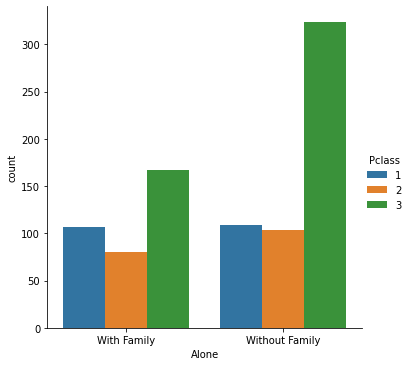

In [337]:
sns.catplot(x = 'Alone',kind='count',data=train_data,hue='Pclass')

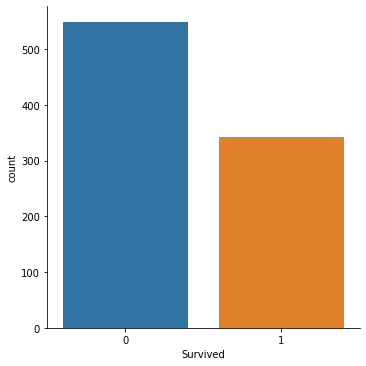

In [338]:
sns.catplot(x = 'Survived',data=train_data,kind='count')

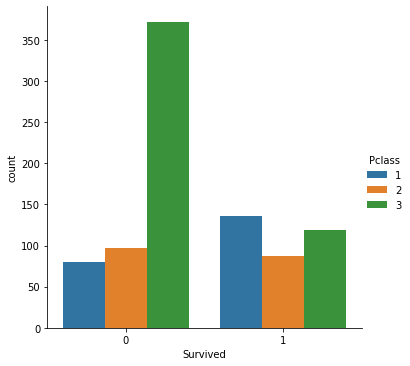

In [339]:
sns.catplot(x = 'Survived',data=train_data,kind='count',hue='Pclass')

In [340]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Without Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Without Family
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Without Family
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Without Family


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


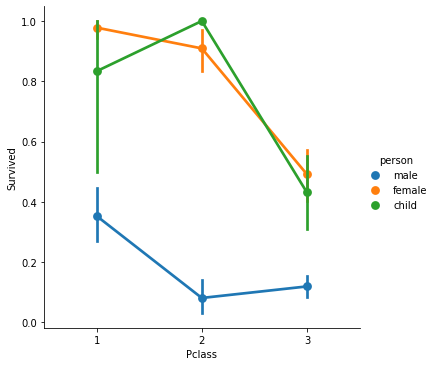

In [341]:
sns.factorplot(x = 'Pclass', y = 'Survived',data=train_data,hue='person')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


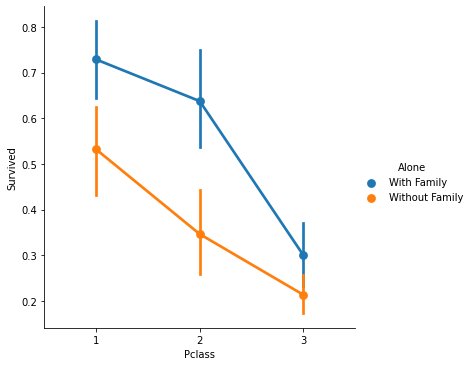

In [342]:
sns.factorplot('Pclass','Survived',data=train_data,hue='Alone')

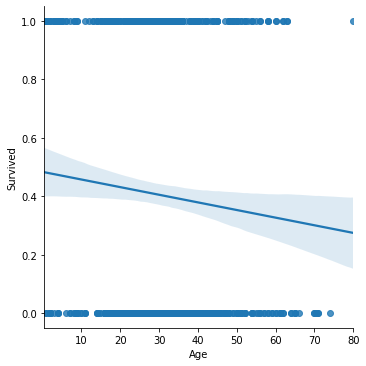

In [343]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data)

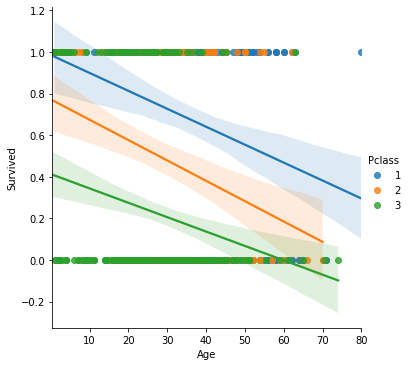

In [344]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Pclass')

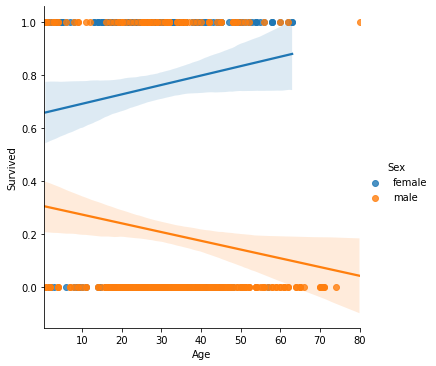

In [345]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Sex')

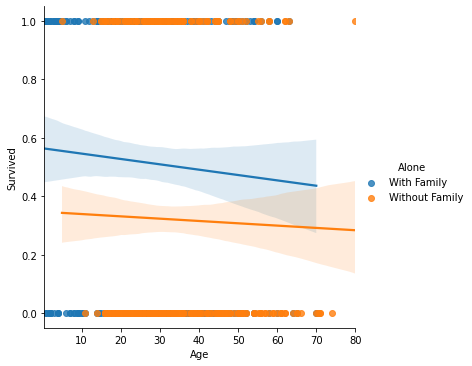

In [346]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Alone')

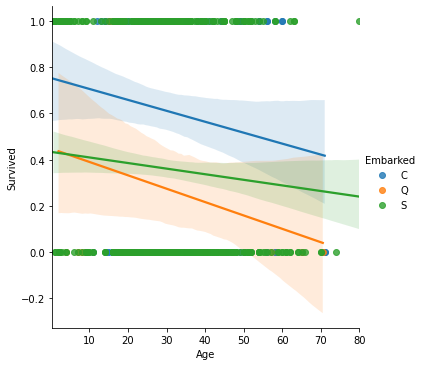

In [347]:
sns.lmplot(x = 'Age', y = 'Survived',data=train_data,hue='Embarked')

In [348]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,2,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,2,27.0,0,0,13.0000,3
887,1,1,19.0,0,0,30.0000,3
888,3,1,28.0,1,2,23.4500,3
889,1,2,26.0,0,0,30.0000,1


## Decision Tree

In [349]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import  tree

In [350]:
cls = DecisionTreeClassifier()

In [351]:
cls.fit(train, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [352]:
cls.score(test, test_target)

0.7727272727272727

In [353]:
cls = DecisionTreeClassifier(max_depth=3)

In [354]:
cls.fit(train, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [355]:
cls.score(test, test_target)*100

96.65071770334929

In [356]:
cls = DecisionTreeClassifier(max_depth=3, max_features=4)

In [357]:
cls.fit(train, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [358]:
cls.score(test, test_target)*100

97.84688995215312

In [359]:
predicted = cls.predict(test)

In [360]:
predicted_value = np.reshape(predicted, (len(predicted), 1))

In [361]:
predicted_df = pd.DataFrame(data=predicted_value, columns=["Predicted Values"])

In [362]:
predicted_df

,Predicted Values
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [363]:
selected_columns = submission_data[["PassengerId"]]
passengers_ID  = selected_columns.copy()

In [364]:
passengers_ID

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [365]:
result = pd.concat([passengers_ID, predicted_df], axis=1)

In [366]:
result

,PassengerId,Predicted Values
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [367]:
result.to_csv('prediction.csv', index=False)

In [368]:
new_data = pd.concat([submission_data, predicted_df], axis=1)

In [369]:
new_data

,PassengerId,Survived,Predicted Values
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [370]:
new_data.loc[new_data['Survived'] == new_data['Predicted Values'], 'Accurate'] = 'True' 
new_data.loc[new_data['Survived'] != new_data['Predicted Values'], 'Accurate'] = 'False' 

In [371]:
new_data

,PassengerId,Survived,Predicted Values,Accurate
0,892,0,0,True
1,893,1,1,True
2,894,0,0,True
3,895,0,0,True
4,896,1,1,True
...,...,...,...,...
413,1305,0,0,True
414,1306,1,1,True
415,1307,0,0,True
416,1308,0,0,True


In [372]:
new_data.Accurate.value_counts()

True     409
False      9
Name: Accurate, dtype: int64

## Random Forest Classifier

In [373]:
from sklearn.ensemble import RandomForestClassifier

In [374]:
classifier = RandomForestClassifier(n_estimators=110, max_features=4, max_depth=2)

In [375]:
classifier.fit(train, train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [376]:
classifier.score(test, test_target)*100

90.43062200956938

In [377]:
predicted = classifier.predict(test)

In [378]:
predicted_value = np.reshape(predicted, (len(predicted), 1))

In [379]:
predicted_df = pd.DataFrame(data=predicted_value, columns=["Predicted Values"])

In [380]:
new_data = pd.concat([submission_data, predicted_df], axis=1)

In [381]:
new_data

,PassengerId,Survived,Predicted Values
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [382]:
result.to_csv('new_prediction.csv', index=False)

### Accuracy

In [383]:
from sklearn.metrics import accuracy_score

In [384]:
accuracy_score(test_target, predicted)

0.9043062200956937

### Feature Importance

In [385]:
fi = rf_feat_importance(classifier, train); fi[:]

,cols,imp
1,Sex,0.592935
0,Pclass,0.198219
5,Fare,0.130503
2,Age,0.041883
6,Embarked,0.017817
3,SibSp,0.012446
4,Parch,0.006196


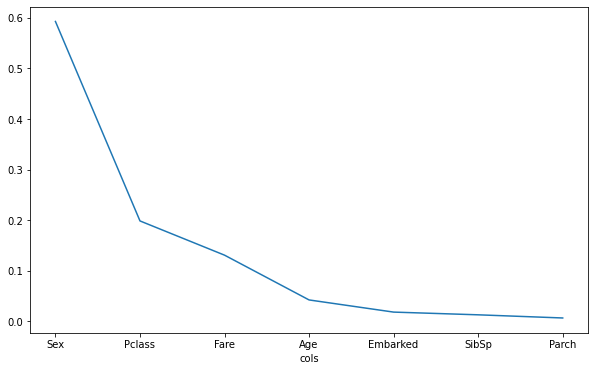

In [386]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [387]:
def plot_fi(fi): 
  return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

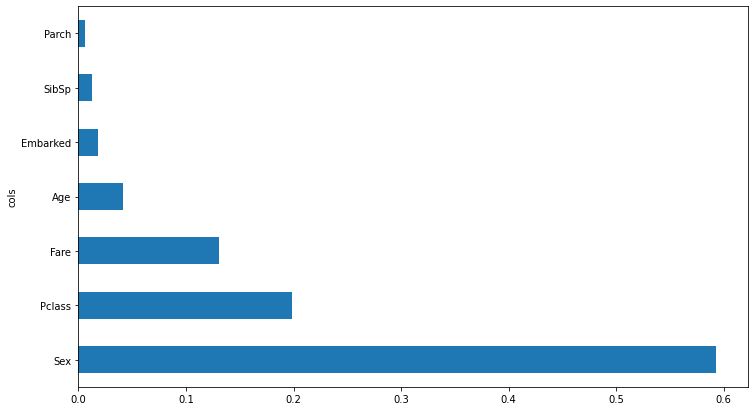

In [388]:
plot_fi(fi[:30]);